<img align="right" width="400" src="https://www.fhnw.ch/de/++theme++web16theme/assets/media/img/fachhochschule-nordwestschweiz-fhnw-logo.svg" alt="FHNW Logo">


# Zero-Shot Classifier using Transformers

by Fabian Märki

## Summary
The aim of this notebook is to show how to use [Huggingface's transformers pipeline](https://huggingface.co/transformers/main_classes/pipelines.html) for [zero-shot classification](https://huggingface.co/transformers/main_classes/pipelines.html#transformers.ZeroShotClassificationPipeline).
The idea is that a trained model can recognize classes it has not been trained before (i.e. get a model to do something that it was not explicitly trained to do).

## Links
- [ZeroShot Learning](https://joeddav.github.io/blog/2020/05/29/ZSL.html)
- [German Zeroshot Model](https://huggingface.co/Sahajtomar/German_Zeroshot)

This notebook contains assigments: <font color='red'>Questions are written in red.</font>

<a href="https://colab.research.google.com/github/markif/2021_HS_CAS_NLP_LAB_Notebooks/blob/master/07_a_ZeroShot_Classifier_using_Transformers.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
%%capture

!pip install 'fhnw-nlp-utils>=0.2.13,<0.3.0'

from fhnw.nlp.utils.storage import download
from fhnw.nlp.utils.storage import load_dataframe
from fhnw.nlp.utils.storage import save_dataframe
from fhnw.nlp.utils.colab import runs_on_colab

import numpy as np
import pandas as pd

In [ ]:
from fhnw.nlp.utils.system import system_info
print(system_info())

In [ ]:
import tensorflow as tf

#physical_devices = tf.config.list_physical_devices('GPU') 
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [2]:
!pip install transformers

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
%%time
download("https://drive.google.com/uc?id=19AFeVnOfX8WXU4_3rM7OFoNTWWog_sb_", "data/german_doctor_reviews_tokenized.parq")
data = load_dataframe("data/german_doctor_reviews_tokenized.parq")
data.shape

CPU times: user 10.5 s, sys: 1.79 s, total: 12.3 s
Wall time: 6.65 s


In [4]:
# remove all neutral sentimens
data = data.loc[(data["label"] != "neutral")]
data.shape

(331187, 10)

In [5]:
data.head(3)

,text_original,rating,text,label,sentiment,token_clean,text_clean,token_lemma,token_stem,token_clean_stopwords
0,Ich bin franzose und bin seit ein paar Wochen ...,2.0,Ich bin franzose und bin seit ein paar Wochen ...,positive,1,"[ich, bin, franzose, und, bin, seit, ein, paar...",ich bin franzose und bin seit ein paar wochen ...,"[franzose, seit, paar, wochen, muenchen, zahn,...","[franzos, seit, paar, woch, muench, ., zahn, s...","[franzose, seit, paar, wochen, muenchen, ., za..."
1,Dieser Arzt ist das unmöglichste was mir in me...,6.0,Dieser Arzt ist das unmöglichste was mir in me...,negative,-1,"[dieser, arzt, ist, das, unmöglichste, was, mi...",dieser arzt ist das unmöglichste was mir in me...,"[arzt, unmöglichste, leben, je, begegnen, unfr...","[arzt, unmog, leb, je, begegnet, unfreund, ,, ...","[arzt, unmöglichste, leben, je, begegnet, unfr..."
2,Hatte akute Beschwerden am Rücken. Herr Magura...,1.0,Hatte akute Beschwerden am Rücken. Herr Magura...,positive,1,"[hatte, akute, beschwerden, am, rücken, ., her...",hatte akute beschwerden am rücken . herr magur...,"[akut, beschwerden, rücken, magura, erste, arz...","[akut, beschwerd, ruck, ., magura, erst, arzt,...","[akute, beschwerden, rücken, ., magura, erste,..."


In [6]:
def get_gpu_device_number():
    """Provides the number of the GPU device
    
    Returns
    -------
    int
        The GPU device number of -1 if none is installed
    """
        
    import tensorflow as tf
    
    return 0 if tf.config.list_physical_devices("GPU") else -1

print("GPU device is", str(get_gpu_device_number()))

GPU device is 0


In [7]:
from transformers import pipeline

For more models see:
- https://huggingface.co/models?pipeline_tag=zero-shot-classification

<font color='red'>**TASK: Provide a `classifier` by following [this description](https://huggingface.co/Sahajtomar/German_Zeroshot#zero-shot-classification-pipeline).**</font>

In [8]:
# TODO: !!! place your code here !!!
####################################
classifier = ...


###################
# TODO: !!! end !!!

Downloading:   0%|          | 0.00/823 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/328 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/240k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [20]:
classifier("Dieser Arzt ist sehr unhöflich.", data["label"].unique(), multi_label=False)

{'sequence': 'Dieser Arzt ist sehr unhöflich.',
 'labels': ['negative', 'positive'],
 'scores': [0.9931422472000122, 0.006857742089778185]}

In [9]:
classifier(["Dieser Arzt ist sehr unhöflich.", "Dieser Arzt ist sehr freundlich."], data["label"].unique(), multi_label=False)

[{'sequence': 'Dieser Arzt ist sehr unhöflich.',
  'labels': ['negative', 'positive'],
  'scores': [0.993142306804657, 0.006857763975858688]},
 {'sequence': 'Ich wurde geheilt.',
  'labels': ['positive', 'negative'],
  'scores': [0.9808481931686401, 0.019151780754327774]}]

<font color='red'>**TASK: Implement `classify` and provide the functionality as described in the function documentation.**</font>

Possible Inspirations:
- See above how the result of the function call look like
- [np.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) might be helpful

In [17]:
candidate_labels = data["label"].unique()

def classify(text):
    """Does a sentiment classification of a text or list of text

    Parameters
    ----------
    text : str, iterable
        The text either as string or iterable (list of text)
        
    Returns
    -------
    str, list
        The sentiment (positive/negative) as a string or a list of strings (depends upon the type of the parameter)
    """
        
    from fhnw.nlp.utils.processing import is_iterable
    import numpy as np
    
    # TODO: !!! place your code here !!!
    ####################################

    classification = ...
    
    if isinstance(text, str):
        return ...
    elif is_iterable(text):
        return ...
    else:
        raise TypeError("Only string or iterable (e.g. list) is supported. Received a "+ str(type(text)))
        
    ###################
    # TODO: !!! end !!!

In [18]:
classify("Dieser Arzt ist sehr unhöflich")

'negative'

In [19]:
classify(["Dieser Arzt ist sehr unhöflich.", "Dieser Arzt ist sehr freundlich."])

['negative', 'positive']

Let's do sentiment classification on the complete dataset (this **took ~4.2h** on my computer - you might want to examine the code but skip execution).

In [12]:
%%time

# Predict one after the other
data["prediction"] = data["text_clean"].apply(lambda text: classify(text))

CPU times: user 4h 14min 49s, sys: 1min 24s, total: 4h 16min 13s
Wall time: 4h 11min 7s


Set Population: 331187
Accuracy: 0.9473


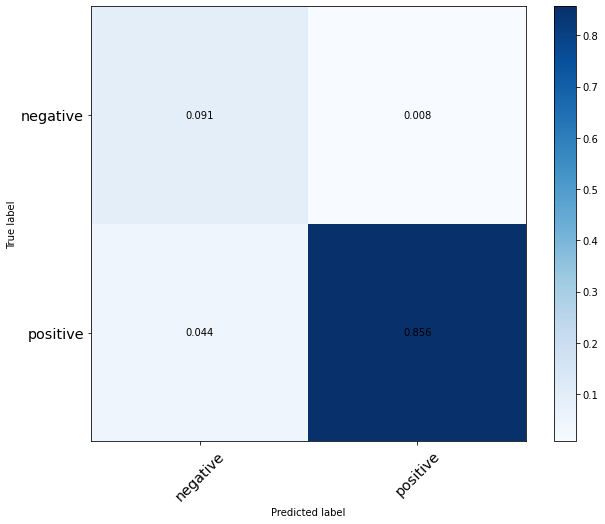

              precision    recall  f1-score   support

    negative       0.67      0.92      0.78     33022
    positive       0.99      0.95      0.97    298165

    accuracy                           0.95    331187
   macro avg       0.83      0.93      0.87    331187
weighted avg       0.96      0.95      0.95    331187



In [16]:
from sklearn.metrics import classification_report
from fhnw.nlp.utils.ploting import plot_confusion_matrix


plot_confusion_matrix(data["label"], data["prediction"])
print(classification_report(data["label"], data["prediction"]))

In [15]:
%%time

from fhnw.nlp.utils.storage import save_dataframe

save_dataframe(data, "data/german_doctor_reviews_zero_shot.parq")

CPU times: user 1min 2s, sys: 916 ms, total: 1min 3s
Wall time: 1min 3s


An attempt to reduce execution time through batch processing...

In [22]:
def save_as_json(classifications, filename):
    import json
    
    with open(filename, "w") as filehandle:
        json.dump(classifications, filehandle)

In [ ]:
%%time

# try batch processing
batch_size = 20
save_every_n_elements = 1000
classifications = []

for g, df in data.groupby(np.arange(len(data)) // batch_size):
    classes = classify(df["text_clean"].to_list())
    classifications.extend(classes)
    
    if (g + 1) % (save_every_n_elements // batch_size) == 0:
        print("Save ", len(classifications))
        save_as_json(classifications, "data/german_doctor_reviews_zero_shot.json")
    

In [ ]:
data = data.assign(prediction=classifications)